# ASSIGNMENT 3 

4.11) With boston dataset

A) create binary variable for above or below median distance

B) Explore data graphically

C) split data into training set and test set

D) Perform LDA on the training data to predict dist01, what is test error

E) Perform QDA on the training data to predict dist01, what is the test error

F) Perform Logistic Regression on the training data, what is the test error 

G) Peform KNN on the training data in order to predict dist, what is the test error



# Question 4.11

Loading and cleaning the data

In [ ]:
from sklearn import datasets
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

#Setting up the dataset
boston = datasets.load_boston()
X = pd.DataFrame( boston.data)
y = pd.DataFrame(boston.target)
X.columns = boston.feature_names
X["MedVal"] =y
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedVal
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


A) Create the binary variable for above median distance

In [3]:
X["DIST_BIN"] = X["DIS"] > np.median(X["DIS"])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedVal,DIST_BIN
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,True
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,True
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,True
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,True
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,True


B) Explore data graphically. 

I want to see how the data vary by the split in distance. Easiest way to do this is just to split the data into the categories by variables and look at the histograms. I've also plotted "catplots" which just provide a more refined  view of the data. 

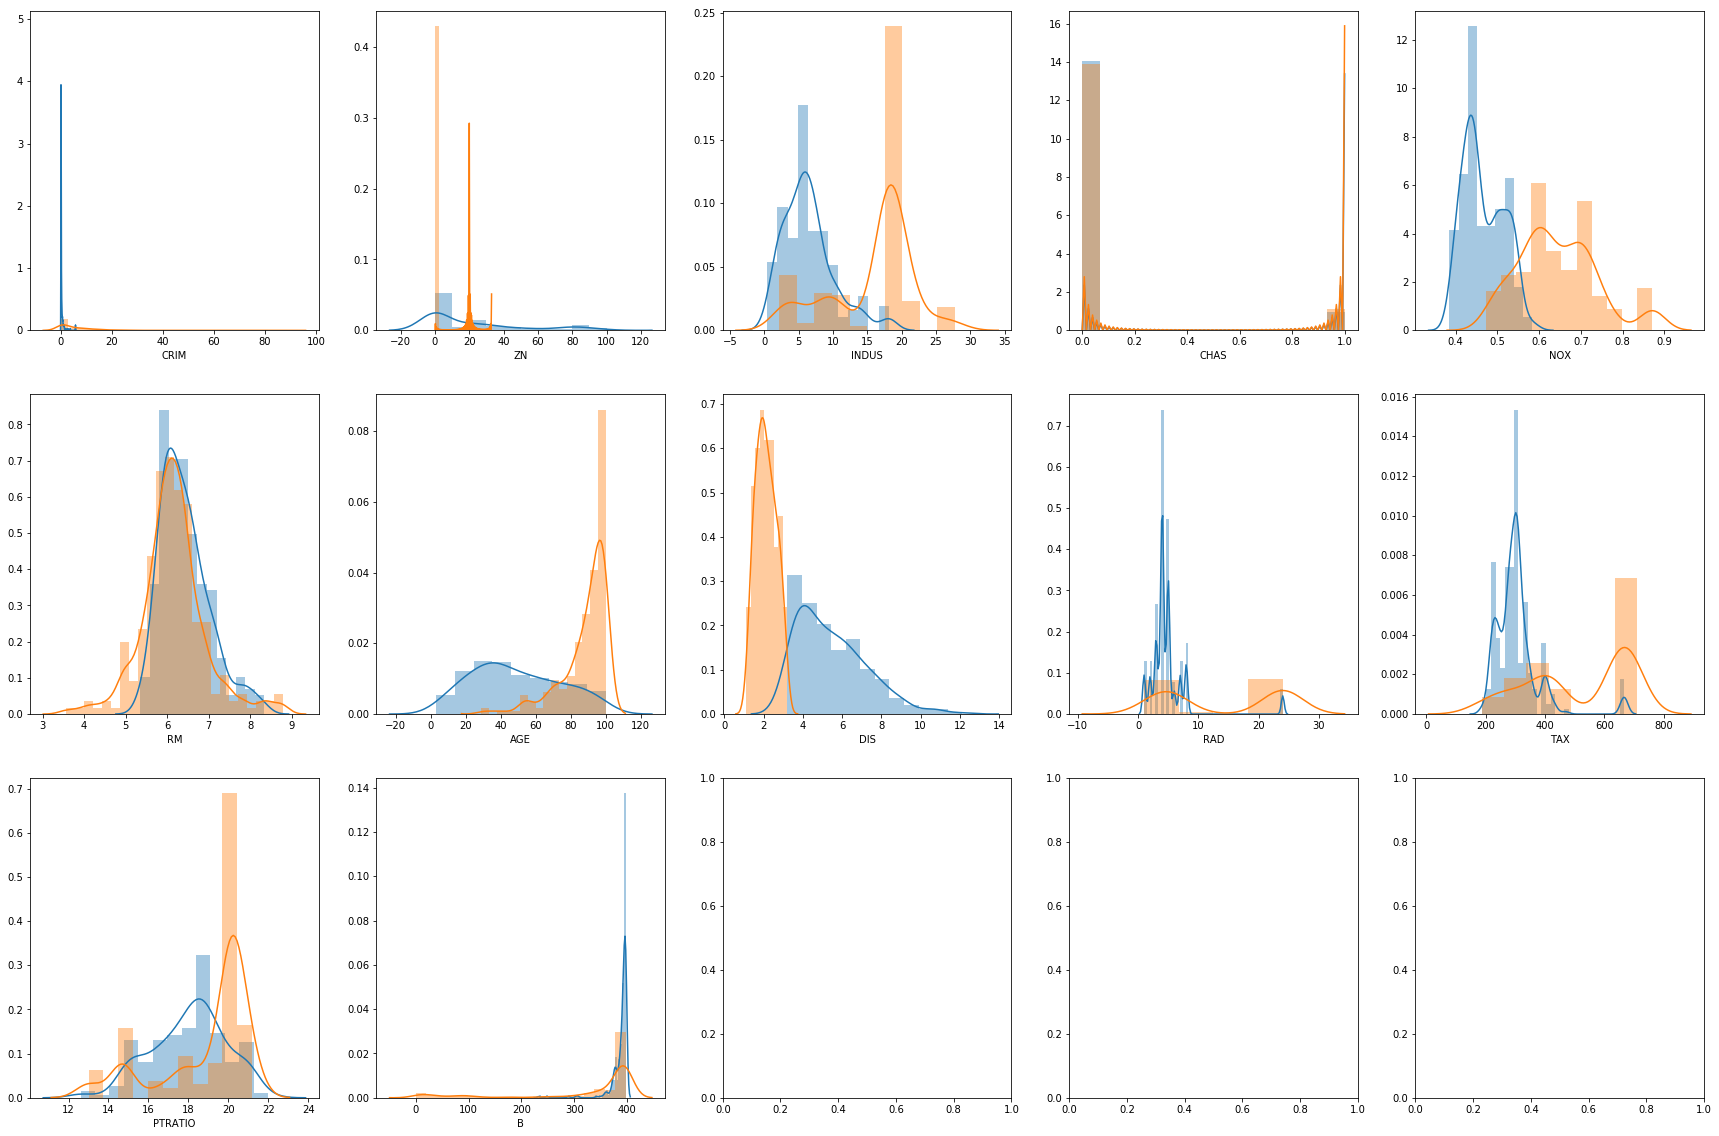

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=5 ,figsize=(30, 20))

#Turn 2-d array to 1d list
ax = ax.ravel()
count = 0
for i in X.columns[0:12]:
    sns.distplot( X[i][X["DIST_BIN"]]  , ax = ax[count])
    sns.distplot( X[i][np.logical_not(X["DIST_BIN"])] ,ax = ax[count] )    
    count = count+1
fig.show()

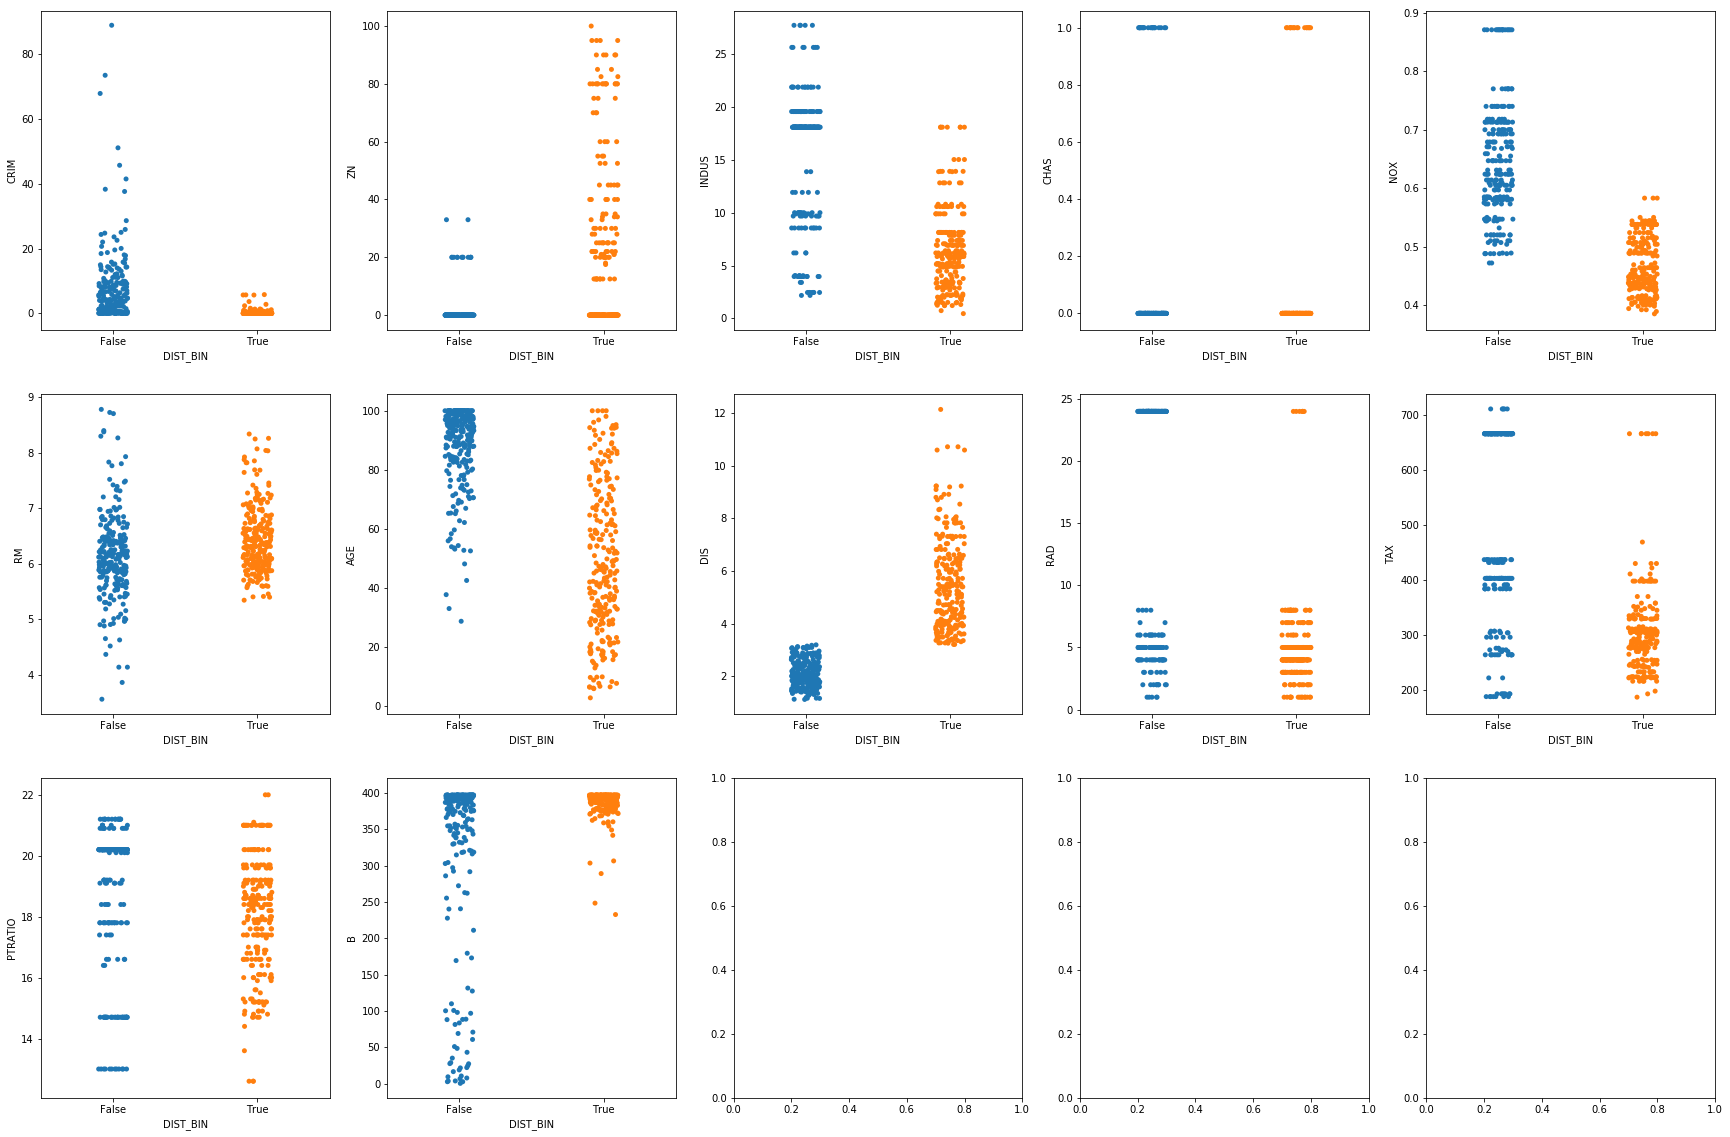

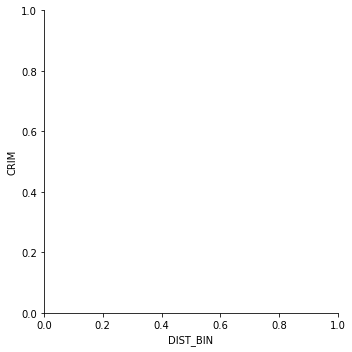

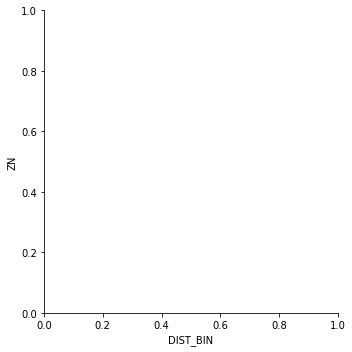

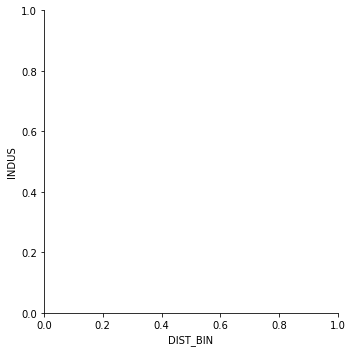

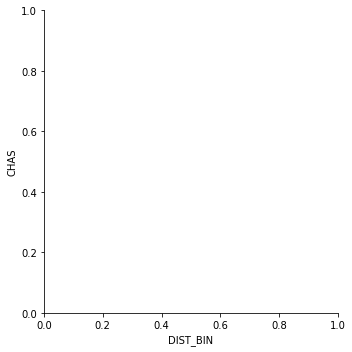

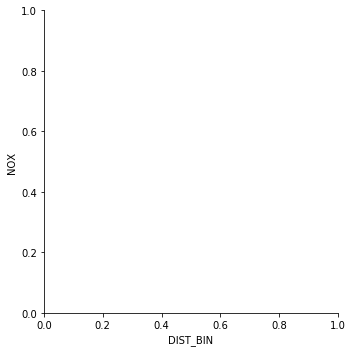

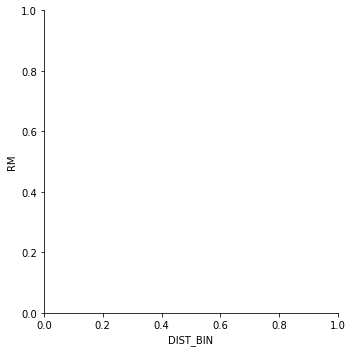

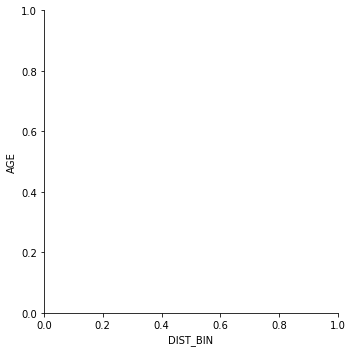

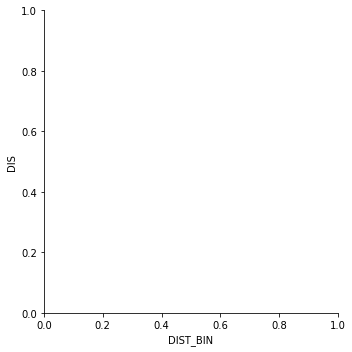

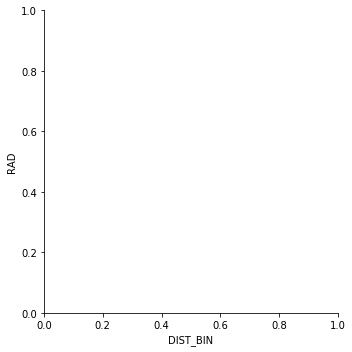

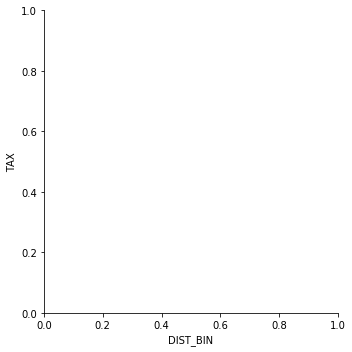

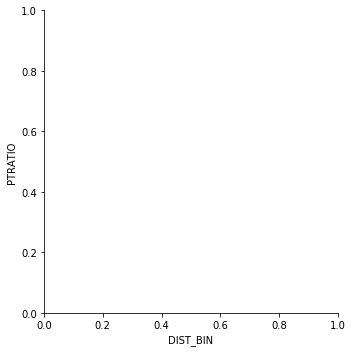

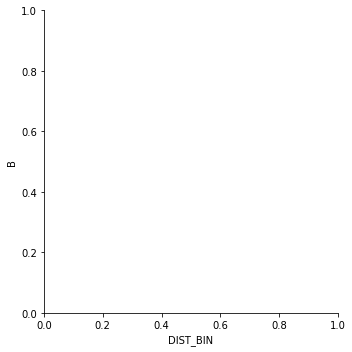

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=5 ,figsize=(30, 20))

#Turn 2-d array to 1d list
ax = ax.ravel()
count = 0
for i in X.columns[0:12]:
    sns.catplot("DIST_BIN",y=i ,data=X,ax=ax[count])
    count = count+1


Good candidate variables here seem to be: CRIM,B, AGE, NOX, INDUS

C) Split data into training and test set. 

In [30]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(X, test_size=0.2,random_state=42)

D) Do LDA and give back the error

Note: I'm just going to give the accuracies for all of these, but the information is the same. 1-accuracy would give the error rate.

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
#clf.fit(train_set[X.columns[0:15]], train_set["DIST_BIN"])
params = ['CRIM','B', 'AGE', 'NOX', 'INDUS']
clf.fit(train_set[params], train_set["DIST_BIN"])
clf.score(test_set[params],test_set["DIST_BIN"])

0.8627450980392157

E) D QDA and give back the error.

In [53]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_q = QuadraticDiscriminantAnalysis()
clf_q.fit(train_set[params], train_set["DIST_BIN"])
clf_q.score(test_set[params],test_set["DIST_BIN"])

0.8431372549019608

F) Do Logistic Regression and give back the error

In [71]:
from sklearn.linear_model import LogisticRegression

#Fit log-reg
clf_LR = LogisticRegression()
clf_LR.fit(train_set[params], train_set["DIST_BIN"])

#Get Accuracy
clf_LR.score(test_set[params],test_set["DIST_BIN"])

0.803921568627451

G) KNN

For this one, I just give the full range of K_nearest neighbors, in reality I should train all the models and pick the elbow one. But it doesn't appear to have all that much difference in this case. There is the expected accuracy drop off as n goes up.

In [74]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,30):
    clf_KNN = KNeighborsClassifier(n_neighbors=i)
    clf_KNN.fit(train_set[params], train_set["DIST_BIN"])
    print("Accuracy for " + str(i)+ "-nearest-neighbors:" +str(clf_KNN.score(test_set[params],test_set["DIST_BIN"])))


Accuracy for 1-nearest-neighbors:0.8333333333333334
Accuracy for 2-nearest-neighbors:0.8529411764705882
Accuracy for 3-nearest-neighbors:0.8431372549019608
Accuracy for 4-nearest-neighbors:0.8431372549019608
Accuracy for 5-nearest-neighbors:0.8333333333333334
Accuracy for 6-nearest-neighbors:0.8137254901960784
Accuracy for 7-nearest-neighbors:0.8529411764705882
Accuracy for 8-nearest-neighbors:0.8333333333333334
Accuracy for 9-nearest-neighbors:0.8529411764705882
Accuracy for 10-nearest-neighbors:0.8333333333333334
Accuracy for 11-nearest-neighbors:0.8431372549019608
Accuracy for 12-nearest-neighbors:0.8235294117647058
Accuracy for 13-nearest-neighbors:0.8431372549019608
Accuracy for 14-nearest-neighbors:0.8333333333333334
Accuracy for 15-nearest-neighbors:0.8431372549019608
Accuracy for 16-nearest-neighbors:0.8333333333333334
Accuracy for 17-nearest-neighbors:0.8333333333333334
Accuracy for 18-nearest-neighbors:0.8137254901960784
Accuracy for 19-nearest-neighbors:0.8235294117647058
Ac

# Question 5.5 

5.5 
Defualt data set 

Predicting default using income and balance

a) Fit Logistic regression model that uses income and balance to predict default

b) 
 i ) Split sample into training and test
 ii) Fit multiple logistic regression using only training
 iii) Obtain prediction for each individual
 iv) Compute error on valdation set 

c) Repeat the process in b) three times, with three different splits. 

d) Would including student lead to a reduction in test error? Explain.




In [80]:
#I had to download the dataset
Default = pd.read_csv("Default.csv")


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588



a) Fit Logistic regression model that uses income and balance to predict default


In [81]:
params= ["balance","income"]
target = "default"

clf_LR = LogisticRegression()
clf_LR.fit(Default[params], Default[target])
clf_LR.score(Default[params], Default[target])

0.9664


b) 
    i ) Split sample into training and validation
    ii) Fit multiple logistic regression using only training
    iii) Obtain prediction for each individual
    iv) Compute error on valdation set 




In [82]:

train_set,test_set = train_test_split(Default, test_size=0.2,random_state=i)
clf_LR= LogisticRegression()
clf_LR.fit(train_set[params], train_set[target])
print("Accuracy: "  +str(clf_LR.score(test_set[params],test_set[target])))
clf_LR.

Accuracy: 0.972



c) Repeat the process in b) three times, with three different splits. 





In [86]:
for i in range(0,3):
    train_set,test_set = train_test_split(Default, test_size=0.2,random_state=i)
    clf_LR= LogisticRegression()
    clf_LR.fit(train_set[params], train_set[target])
    print("Accuracy: "  +str(clf_LR.score(test_set[params],test_set[target])))

Accuracy: 0.963
Accuracy: 0.9705
Accuracy: 0.9715


d) Would including student lead to a reduction in test error? Explain.